# Importations

In [1]:
from imports import *                    # pandas, numpy, etc.
from trading_environment import (
    DataManager,
    Optimizer,
    PerformanceAnalyzer,
    ReportManager,
    RiskManager,
    DATA_DIR,
    MAX_FILE_SIZE,
    REPORT_DIR
)
from strategies import (
    MovingAverageCrossStrategy,
    DcaStrategy,
    DonchianBreakoutStrategy,
    ADXTrendStrategy,
    ROCStrategy,
    MACDStrategy,
    BollingerMeanRevStrategy,
    RSIStrategy,
    PairTradingStrategy,
    VWAPStrategy
)

d:\Desktop\Algorithmic Trading\Prueba\venv310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Strategies

In [2]:
# 1) Load data
dm = DataManager(data_dir=DATA_DIR, max_file_size=MAX_FILE_SIZE)
data = dm.load_data(
    symbols='BTC-USD',
    period='2y',
    interval='1d'
)

In [3]:
strategies = [
    MovingAverageCrossStrategy, DcaStrategy, DonchianBreakoutStrategy,
    ADXTrendStrategy, ROCStrategy, MACDStrategy, BollingerMeanRevStrategy,
    RSIStrategy, PairTradingStrategy, VWAPStrategy
]

# run Bayesian optimisation on each and pick the best overall by Sharpe:
best_strategy, best_params, perf_df, equity_map = Optimizer.find_best_strategy(
    strategies,
    data,
    method='bayes',
    metric='Sharpe',
    n_trials=50,       # passed into optimize_bayesian
    seed=42
)



2025-06-27 16:40:38,122 - INFO - Descargando tickers=['AAPL'], start=None, end=None, period=2y, interval=1d
2025-06-27 16:40:38,897 - INFO - Guardado caché data\AAPL_2y_1d_part1.csv (503 filas)
2025-06-27 16:40:38,899 - INFO - Descargando tickers=['ETH-USD'], start=None, end=None, period=2y, interval=1d
2025-06-27 16:40:39,142 - INFO - Guardado caché data\ETH-USD_2y_1d_part1.csv (732 filas)
2025-06-27 16:40:39,269 - INFO - Descargando tickers=['GS'], start=None, end=None, period=2y, interval=1d
2025-06-27 16:40:39,745 - INFO - Guardado caché data\GS_2y_1d_part1.csv (503 filas)


In [4]:
print("Best strategy:", best_strategy)
print("Params:       ", best_params)

Best strategy: <strategies.RSIStrategy object at 0x000001B96AF573A0>
Params:        {'window': 20, 'low': 35, 'high': 80}


In [5]:
perf_df

,Total Return,Ann. Return,Ann. Vol,Sharpe,Max Drawdown,Win Rate,Profit Factor,Expectancy
strategy,,,,,,,,
RSI 20,0.505320,0.151200,0.096072,1.512122,-0.024605,0.027322,5.726461,-0.007986
DCA 633.4458130554381@W,2.816080,0.585729,0.394387,1.365156,-0.281445,0.504098,1.288865,0.002012
MA 15/100,0.160253,0.052502,0.039728,1.307543,-0.001656,0.009563,49.514412,-0.001330
VWAP,2.449748,0.531581,0.402633,1.258949,-0.281445,0.524590,1.256784,0.001989
MACD 8/80/27,0.317968,0.099711,0.086352,1.142810,-0.051127,0.031421,3.009816,-0.013228
Donchian 50,0.678097,0.195077,0.197518,0.999340,-0.150534,0.080601,1.600999,-0.014156
MA 45/190 + ADX,0.050272,0.017029,0.021334,0.801978,0.000000,0.002732,NaN,0.000068
ROC 35,0.970697,0.263067,0.400870,0.782614,-0.418827,0.493169,1.155607,0.000385
BB Rev 10/2.73235229154987,0.015513,0.005314,0.009102,0.586739,0.000000,0.001366,NaN,0.000021


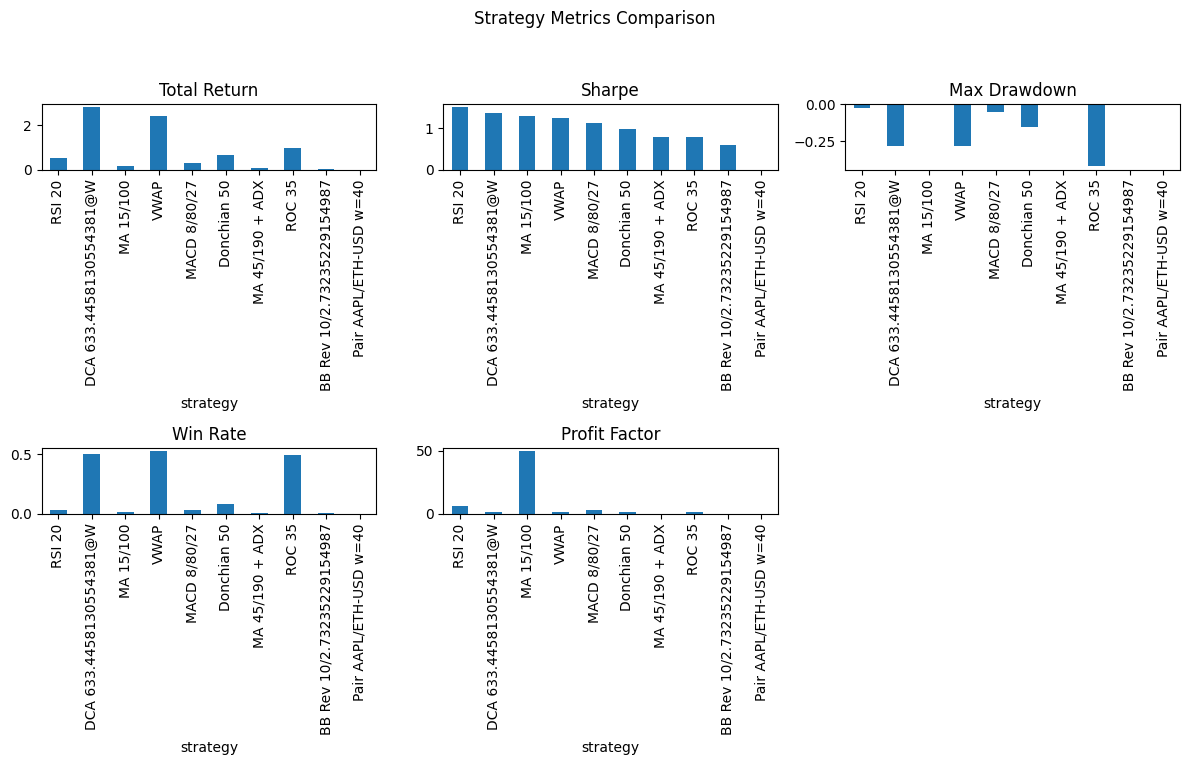

In [6]:
rm = ReportManager()
rm.plot_metrics(
    perf_df,
    metrics=['Total Return', 'Sharpe', 'Max Drawdown', 'Win Rate', 'Profit Factor']
)

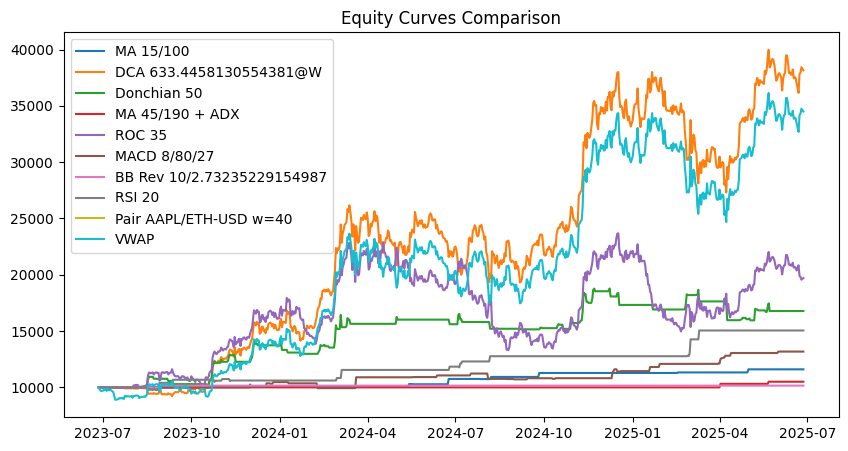

In [7]:
# Overlay equity curves
rm.plot_equity_curves(equity_map)


# END